In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

df = pd.read_excel("C:\\Users\\Mehmet Ali\\Desktop\\Datalar\\Pusula Academy\\Talent_Academy_Case_DT_2025.xlsx")

In [7]:
print("Veri Boyutu:", df.shape)
df.head(5)

Veri Boyutu: (2235, 13)


,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB


In [9]:
print("Eksik Değer Sayısı:\n", df.isnull().sum().sort_values(ascending=False))
print("\nEksik Değer Oranı:\n", (df.isnull().sum().sort_values(ascending=False) / len(df)) * 100)

Eksik Değer Sayısı:
 Alerji             944
KanGrubu           675
KronikHastalik     611
UygulamaYerleri    221
Cinsiyet           169
Tanilar             75
Bolum               11
HastaNo              0
Yas                  0
Uyruk                0
TedaviAdi            0
TedaviSuresi         0
UygulamaSuresi       0
dtype: int64

Eksik Değer Oranı:
 Alerji             42.237136
KanGrubu           30.201342
KronikHastalik     27.337808
UygulamaYerleri     9.888143
Cinsiyet            7.561521
Tanilar             3.355705
Bolum               0.492170
HastaNo             0.000000
Yas                 0.000000
Uyruk               0.000000
TedaviAdi           0.000000
TedaviSuresi        0.000000
UygulamaSuresi      0.000000
dtype: float64


<Axes: >

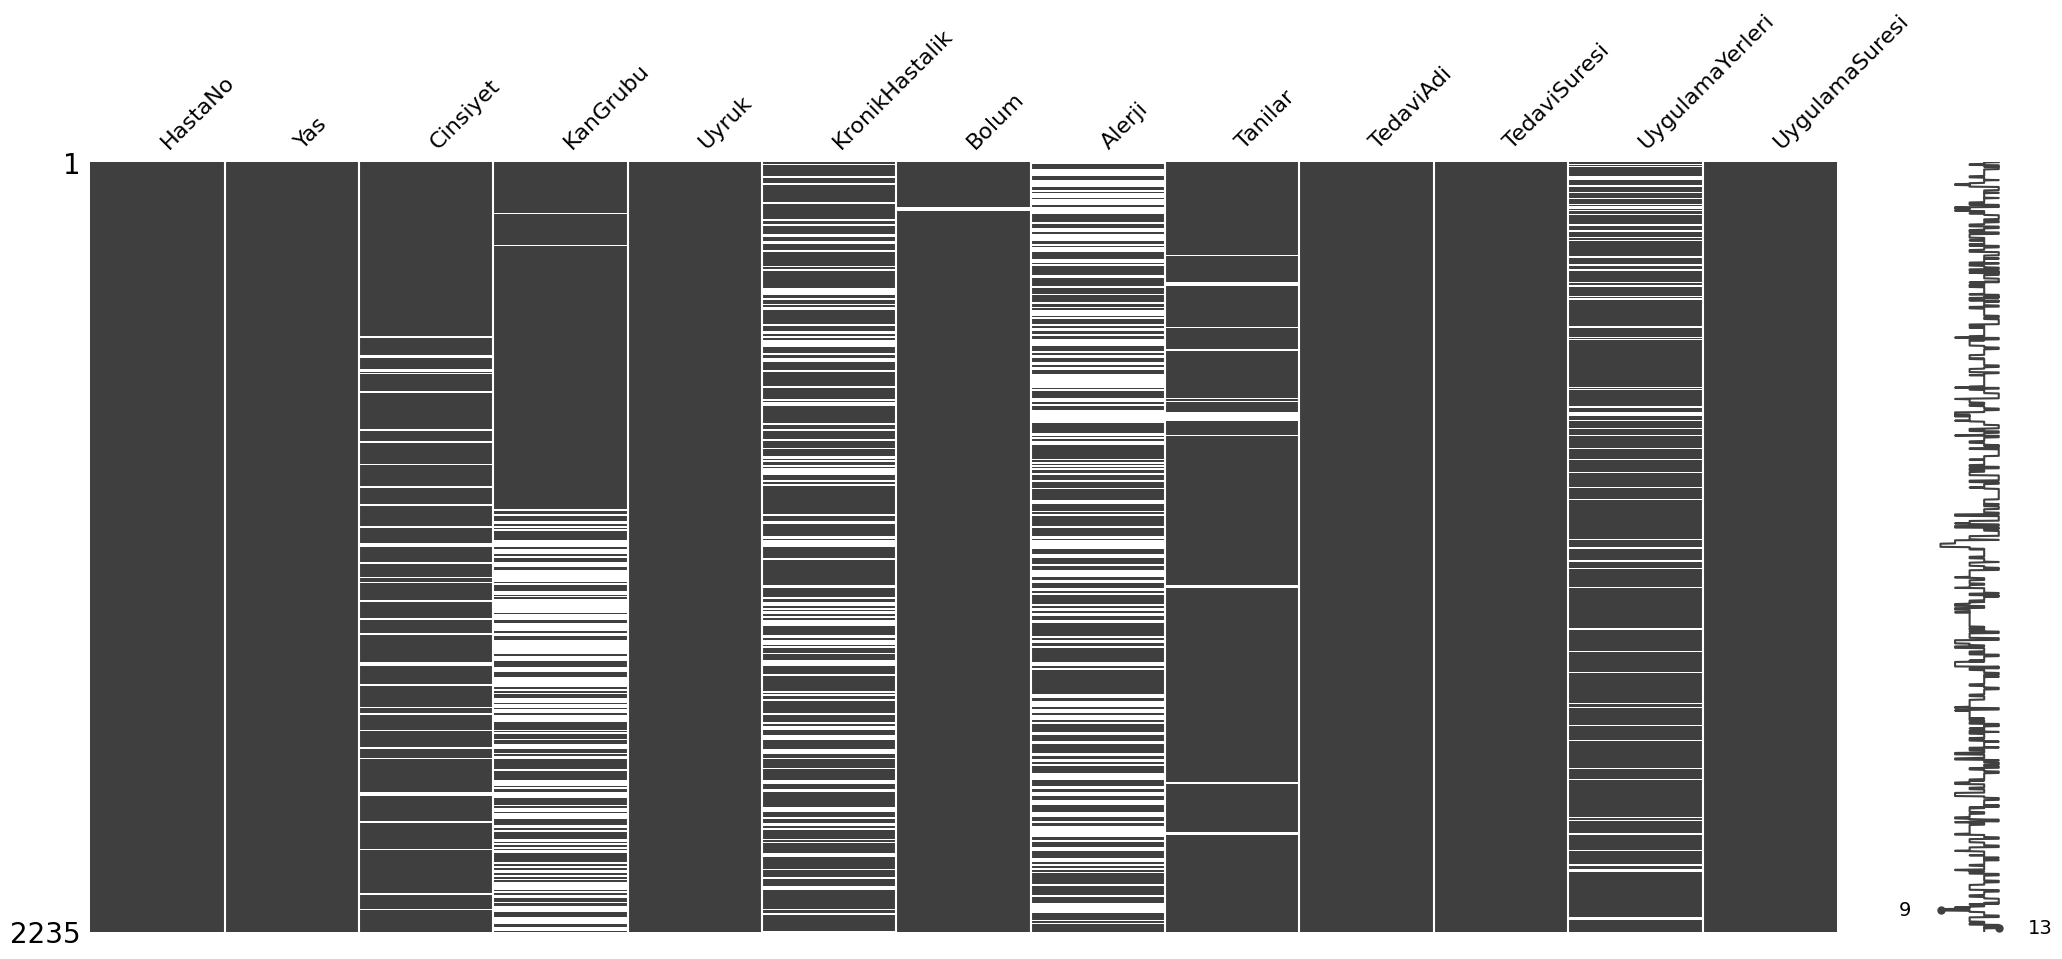

In [10]:
import missingno as msno

msno.matrix(df)

In [ ]:
df_clean = df.copy()

In [ ]:
df_clean['Cinsiyet'] = df_clean['Cinsiyet'].fillna('Eksik')
df_clean['Alerji'] = df_clean['Alerji'].fillna('Bilinmiyor')
df_clean['KanGrubu'] = df_clean['KanGrubu'].fillna('Bilinmiyor')
df_clean['KronikHastalik'] = df_clean['KronikHastalik'].fillna('Bilinmiyor')
df_clean['UygulamaYerleri'] = df_clean['UygulamaYerleri'].fillna('Bilinmiyor')
df_clean['Tanilar'] = df_clean['Tanilar'].fillna('Bilinmiyor')
df_clean['Bolum'] = df_clean['Bolum'].fillna('Bilinmiyor')


df_clean['Yas'] = df_clean['Yas'].fillna(np.nan)


In [ ]:
df_clean['TedaviSuresi_Num'] = df_clean['TedaviSuresi'].str.extract('(\d+)').astype(float)
df_clean['UygulamaSuresi_Num'] = df_clean['UygulamaSuresi'].str.extract('(\d+)').astype(float)


In [58]:
print(df_clean['TedaviSuresi_Num'].describe()) 
print(df_clean['UygulamaSuresi_Num'].describe())

count    2235.000000
mean       14.570917
std         3.725322
min         1.000000
25%        15.000000
50%        15.000000
75%        15.000000
max        37.000000
Name: TedaviSuresi_Num, dtype: float64
count    2235.000000
mean       16.573154
std         6.268635
min         3.000000
25%        10.000000
50%        20.000000
75%        20.000000
max        45.000000
Name: UygulamaSuresi_Num, dtype: float64


Text(0.5, 0, 'Tedavi Süresi (Dakika)')

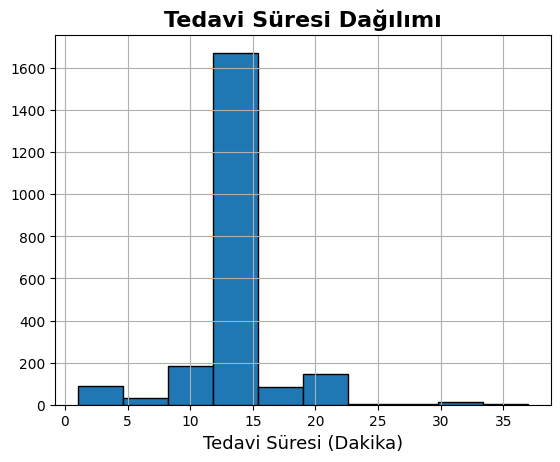

In [ ]:
df_clean['TedaviSuresi_Num'].hist(bins=10, color='#1f77b4', edgecolor='black')
plt.title("Tedavi Süresi Dağılımı", fontsize=16, fontweight='bold')
plt.xlabel("Tedavi Süresi (Dakika)", fontsize=13)

Text(0.5, 0, 'Uygulama Süresi (Dakika)')

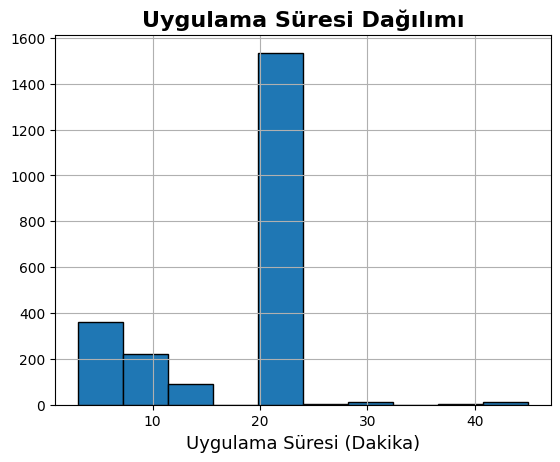

In [59]:
df_clean['UygulamaSuresi_Num'].hist(bins=10, color='#1f77b4', edgecolor='black')
plt.title("Uygulama Süresi Dağılımı", fontsize=16, fontweight='bold')
plt.xlabel("Uygulama Süresi (Dakika)", fontsize=13)

In [ ]:
df_patient = df_clean.groupby('HastaNo').first().reset_index()


In [ ]:
df_patient.head()

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi,TedaviSuresi_Num,UygulamaSuresi_Num
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika,5.0,20.0
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Bilinmiyor,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika,15.0,20.0
2,145136,60,Erkek,0 Rh+,Türkiye,Bilinmiyor,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","POLEN,NOVALGIN",Parapleji ve tetrapleji,Parapleji,10 Seans,Bilinmiyor,30 Dakika,10.0,30.0
3,145137,65,Kadın,0 Rh+,Türkiye,"Hiportiroidizm, Diyabet, Duchenne Musküler Dis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NOVALGIN,"Artroz, tanımlanmamış, el",El rehabilitasyonu,15 Seans,Sol El Bilek Bölgesi,15 Dakika,15.0,15.0
4,145138,61,Kadın,A Rh+,Türkiye,"Hiportiroidizm, Fascioscapulohumeral Distrofi,...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Bilinmiyor,Eklem ağrısı,Gonartroz-Meniskopati,18 Seans,Diz,20 Dakika,18.0,20.0


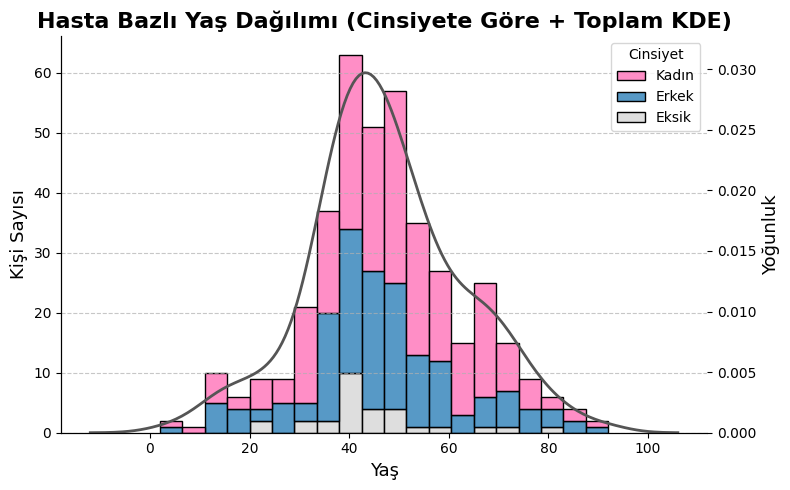

In [ ]:
import matplotlib.ticker as mtick

gender_palette = {
    "Erkek": "#1f77b4",
    "Kadın": "#ff69b4",
    "Eksik": "#D3D3D3"
}

fig, ax1 = plt.subplots(figsize=(8,5))

sns.histplot(
    data=df_patient,
    x='Yas',
    hue='Cinsiyet',
    palette=gender_palette,
    multiple='stack',
    edgecolor='black',
    bins=20,
    ax=ax1
)

ax1.set_xlabel("Yaş", fontsize=13)
ax1.set_ylabel("Kişi Sayısı", fontsize=13)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

ax2 = ax1.twinx()
sns.kdeplot(
    data=df_patient['Yas'],
    color='#555555',  
    lw=2,
    ax=ax2
)

ax2.set_ylabel("Yoğunluk", fontsize=13)
ax2.set_ylim(0, ax2.get_ylim()[1]*1.05)  

plt.title("Hasta Bazlı Yaş Dağılımı (Cinsiyete Göre + Toplam KDE)", fontsize=16, fontweight="bold")
sns.despine()
plt.tight_layout()
plt.show()


C:\Users\Mehmet Ali\AppData\Local\Temp\ipykernel_2284\2292129188.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="YasKategori", data=df_patient, palette=age_palette, order=labels)


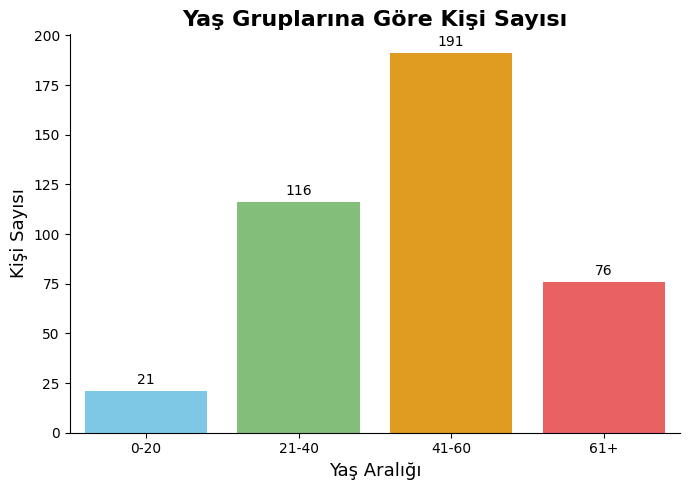

In [ ]:
bins = [0, 20, 40, 60, df["Yas"].max()]
labels = ["0-20", "21-40", "41-60", "61+"]
df_patient["YasKategori"] = pd.cut(df_patient["Yas"], bins=bins, labels=labels, right=True)


age_palette = {
    "0-20": "#6ECFF6", 
    "21-40": "#7BC96F", 
    "41-60": "#FFA600", 
    "61+": "#FF4C4C"
}


plt.figure(figsize=(7,5))
ax = sns.countplot(x="YasKategori", data=df_patient, palette=age_palette, order=labels)
plt.title("Yaş Gruplarına Göre Kişi Sayısı", fontsize=16, fontweight="bold")
plt.xlabel("Yaş Aralığı", fontsize=13)
plt.ylabel("Kişi Sayısı", fontsize=13)


for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 8), textcoords='offset points')

sns.despine()
plt.tight_layout()
plt.show()

C:\Users\Mehmet Ali\AppData\Local\Temp\ipykernel_2284\4005712227.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


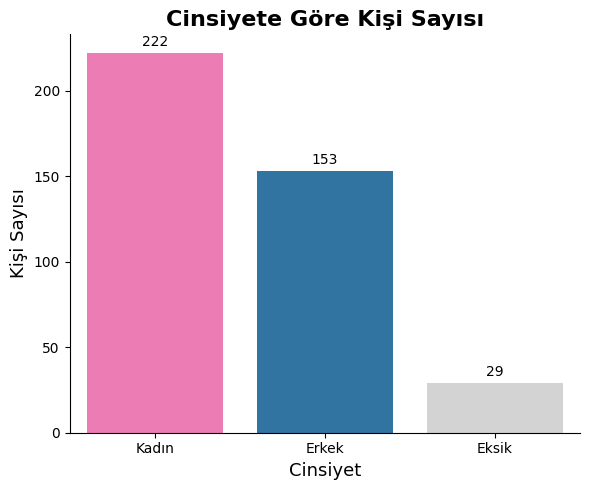

In [ ]:

gender_palette = {
    "Erkek": "#1f77b4",      
    "Kadın": "#ff69b4",      
    "Eksik": "#D3D3D3"       
}


gender_count = df_patient['Cinsiyet'].value_counts()  


order = gender_count.index.tolist()


plt.figure(figsize=(6,5))
ax = sns.countplot(
    x='Cinsiyet', 
    data=df_patient,
    palette=gender_palette,
    order=order
)

plt.title("Cinsiyete Göre Kişi Sayısı", fontsize=16, fontweight="bold")
plt.xlabel("Cinsiyet", fontsize=13)
plt.ylabel("Kişi Sayısı", fontsize=13)


for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 8), textcoords='offset points')

sns.despine()
plt.tight_layout()
plt.show()


In [19]:
kronik_list = df_clean['KronikHastalik'].str.split(',').explode().str.strip().value_counts()
bolum_list = df_clean['Bolum'].str.split(',').explode().str.strip().value_counts()
alerji_list = df_clean['Alerji'].str.split(',').explode().str.strip().value_counts()
tani_list = df_clean['Tanilar'].str.split(',').explode().str.strip().value_counts()
uygulama_list = df_clean['UygulamaYerleri'].str.split(',').explode().str.strip().value_counts()
kronik_list, bolum_list, alerji_list, tani_list, uygulama_list

(KronikHastalik
 Bilinmiyor                       611
 Aritmi                           395
 Hiportiroidizm                   383
 Limb-Girdle Musküler Distrofi    379
 Astım                            351
 Hipertiroidizm                   327
 Myastenia gravis                 316
 Diyabet                          308
 Duchenne Musküler Distrofisi     307
 Fascioscapulohumeral Distrofi    304
 Kalp yetmezliği                  301
 Hipertansiyon                    285
 Polimiyozit                      275
 Becker Musküler Distrofisi       243
 Guatr                              3
 Hipotirodizm                       3
 Name: count, dtype: int64,
 Bolum
 Fiziksel Tıp Ve Rehabilitasyon    2045
 Solunum Merkezi                   2045
 Ortopedi Ve Travmatoloji            88
 İç Hastalıkları                     32
 Nöroloji                            17
 Kardiyoloji                         11
 Bilinmiyor                          11
 Göğüs Hastalıkları                   8
 Laboratuar          

C:\Users\Mehmet Ali\AppData\Local\Temp\ipykernel_2284\1626367017.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


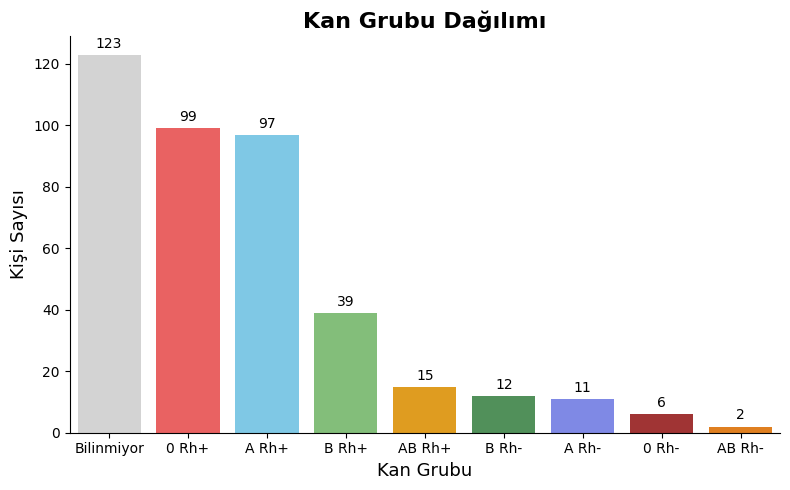

In [ ]:

blood_palette = {
    "A Rh+": "#6ECFF6", 
    "A Rh-": "#6E7CF6", 
    "B Rh+": "#7BC96F", 
    "B Rh-": "#469A53", 
    "AB Rh+": "#FFA600", 
    "AB Rh-": "#FF7F00", 
    "0 Rh+": "#FF4C4C", 
    "0 Rh-": "#B22222",
    "Bilinmiyor": "#D3D3D3"
}


kan_grubu_sayim = df_patient['KanGrubu'].value_counts()


order = kan_grubu_sayim.index.tolist()


plt.figure(figsize=(8,5))
ax = sns.countplot(
    x='KanGrubu', 
    data=df_patient, 
    palette=blood_palette,
    order=order
)

plt.title("Kan Grubu Dağılımı", fontsize=16, fontweight="bold")
plt.xlabel("Kan Grubu", fontsize=13)
plt.ylabel("Kişi Sayısı", fontsize=13)


for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 8), textcoords='offset points')

sns.despine()
plt.tight_layout()
plt.show()


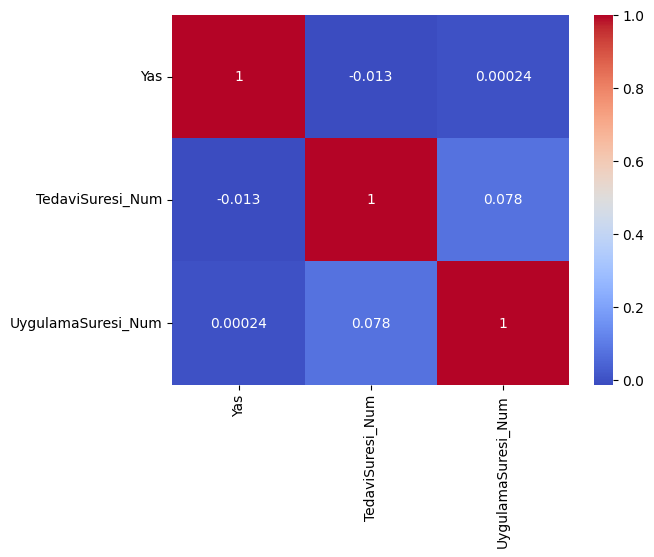

In [21]:
sns.heatmap(df_clean[['Yas','TedaviSuresi_Num','UygulamaSuresi_Num']].corr(), annot=True, cmap='coolwarm')
plt.show()


C:\Users\Mehmet Ali\AppData\Local\Temp\ipykernel_2284\1017977953.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kronik_count.values, y=kronik_count.index, palette='viridis')


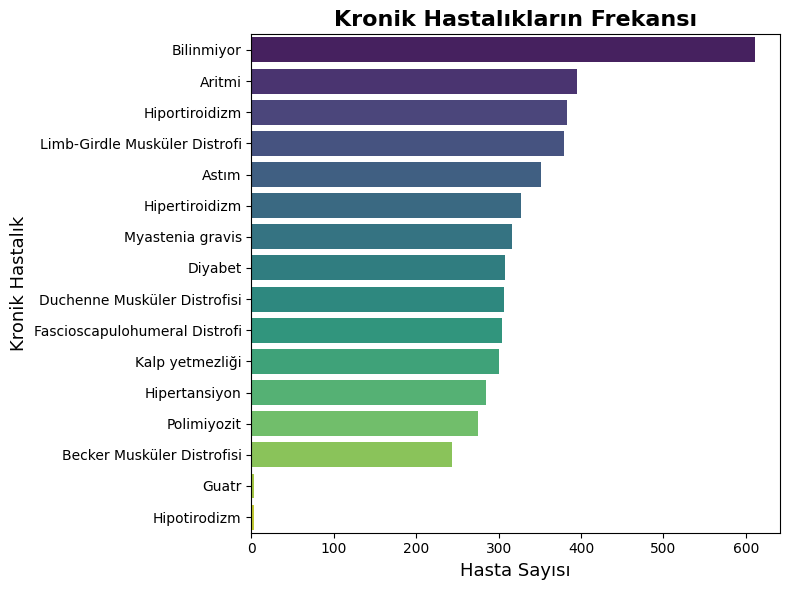

In [ ]:

kronik_list = df_clean['KronikHastalik'].str.split(',').explode().str.strip()
kronik_count = kronik_list.value_counts()

plt.figure(figsize=(8,6))
sns.barplot(x=kronik_count.values, y=kronik_count.index, palette='viridis')
plt.title("Kronik Hastalıkların Frekansı", fontsize=16, fontweight='bold')
plt.xlabel("Hasta Sayısı", fontsize=13)
plt.ylabel("Kronik Hastalık", fontsize=13)
plt.tight_layout()
plt.show()


C:\Users\Mehmet Ali\AppData\Local\Temp\ipykernel_2284\1537717892.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tanilar_count.values, y=tanilar_count.index, palette='magma')


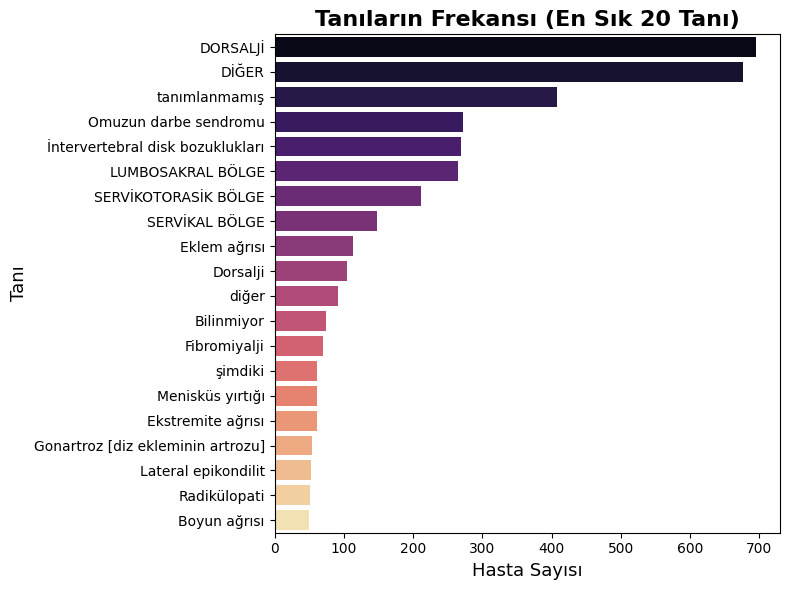

In [23]:
tanilar_list = df_clean['Tanilar'].str.split(',').explode().str.strip()
tanilar_count = tanilar_list.value_counts().head(20)  # En sık 20 tanı

plt.figure(figsize=(8,6))
sns.barplot(x=tanilar_count.values, y=tanilar_count.index, palette='magma')
plt.title("Tanıların Frekansı (En Sık 20 Tanı)", fontsize=16, fontweight='bold')
plt.xlabel("Hasta Sayısı", fontsize=13)
plt.ylabel("Tanı", fontsize=13)
plt.tight_layout()
plt.show()


C:\Users\Mehmet Ali\AppData\Local\Temp\ipykernel_2284\2467279550.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=alerji_count.values, y=alerji_count.index, palette='coolwarm')


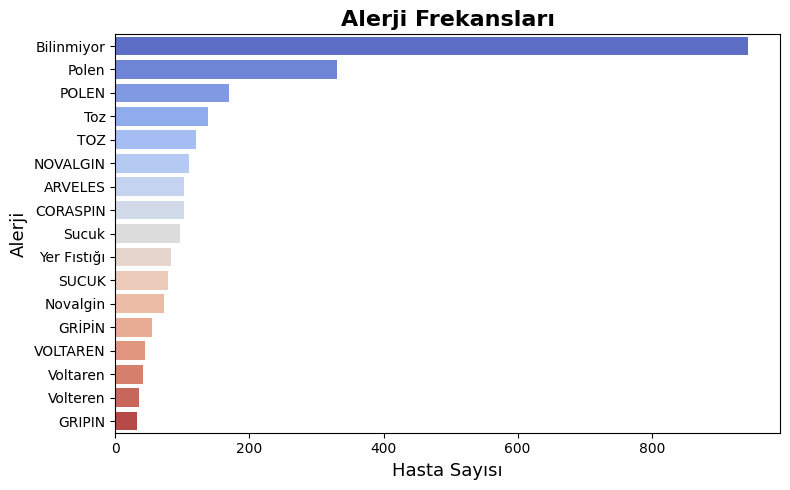

In [24]:
alerji_list = df_clean['Alerji'].str.split(',').explode().str.strip()
alerji_count = alerji_list.value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=alerji_count.values, y=alerji_count.index, palette='coolwarm')
plt.title("Alerji Frekansları", fontsize=16, fontweight='bold')
plt.xlabel("Hasta Sayısı", fontsize=13)
plt.ylabel("Alerji", fontsize=13)
plt.tight_layout()
plt.show()


C:\Users\Mehmet Ali\AppData\Local\Temp\ipykernel_2284\2205164564.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tedavi_top.values, y=tedavi_top.index, palette='Set2')


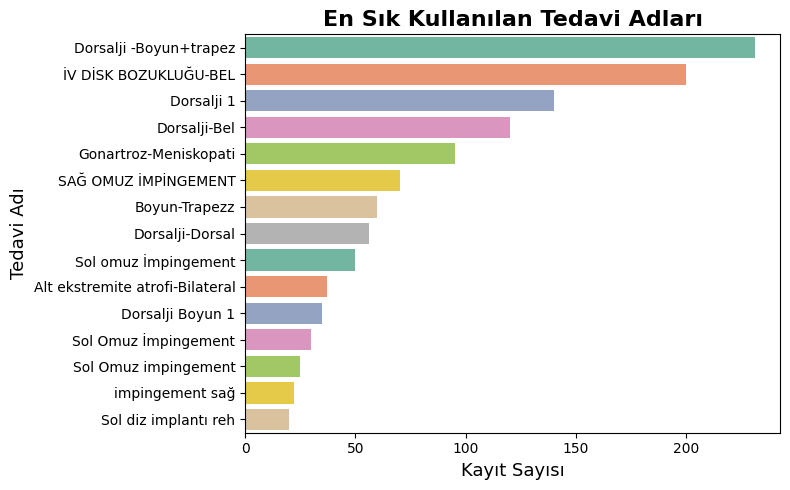

In [ ]:
tedavi_top = df_clean['TedaviAdi'].value_counts().head(15)

plt.figure(figsize=(8,5))
sns.barplot(x=tedavi_top.values, y=tedavi_top.index, palette='Set2')
plt.title("En Sık Kullanılan Tedavi Adları", fontsize=16, fontweight='bold')
plt.xlabel("Kayıt Sayısı", fontsize=13)
plt.ylabel("Tedavi Adı", fontsize=13)
plt.tight_layout()
plt.show()


C:\Users\Mehmet Ali\AppData\Local\Temp\ipykernel_2284\615178610.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bolum_count.values, y=bolum_count.index, palette='pastel')


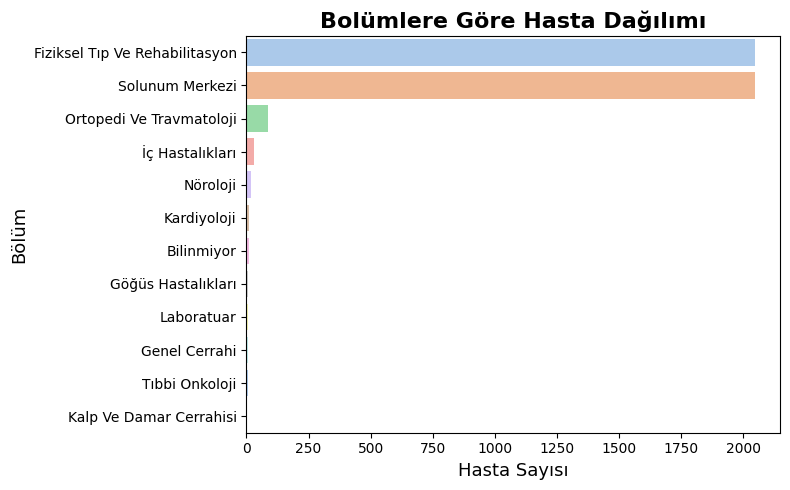

In [26]:
bolum_list = df_clean['Bolum'].str.split(',').explode().str.strip()
bolum_count = bolum_list.value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=bolum_count.values, y=bolum_count.index, palette='pastel')
plt.title("Bolümlere Göre Hasta Dağılımı", fontsize=16, fontweight='bold')
plt.xlabel("Hasta Sayısı", fontsize=13)
plt.ylabel("Bölüm", fontsize=13)
plt.tight_layout()
plt.show()
